In [1]:
print("------------------")
print("Program Started for DNN Char Yield Model")
print("------------------\n")

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import time
import os
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from sklearn import model_selection
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from tensorboard.plugins.hparams import api as hp
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

print(tf.__version__)

print("--------Modules have been loaded----------\n")

------------------
Program Started for DNN Char Yield Model
------------------

2.6.0-dev20210508
--------Modules have been loaded----------



In [2]:

dir_p = 'C:\\Users\\Honeyz\\Desktop\\Modeling\\Final models\\CoPyro Project\\Data\\CharCoPyroDataProcessed_Proximate.csv'

raw_dataset = pd.read_csv(dir_p, skipinitialspace=True)

dataset = raw_dataset.copy()
dataset = dataset.dropna()

print("--------Data have been loaded & splitted---------\n")

_seed = 42 
_random_state = np.random.RandomState(_seed)
strata_1 = pd.cut(dataset.loc[:, "w%P"], bins=[-1, 15, 35, 50, 75, 90, np.inf],labels=[1, 2, 3, 4, 5, 6])
training_data, testing_data = model_selection.train_test_split(dataset, test_size=0.15, random_state=_random_state)

print("--------Data have been stratified----------\n")
training_features = training_data.drop("Char%", axis=1).astype(float)
training_target = training_data.loc[:, ["Char%"]].astype(float)

testing_features = testing_data.drop("Char%", axis=1)
testing_target = testing_data.loc[:, ["Char%"]]

sc = StandardScaler()
mmc = MinMaxScaler()
#X_train = sc.fit_transform(training_features)
#X_test = sc.fit_transform(testing_features)
#X_train = mmc.fit_transform(training_features)
#X_test = mmc.fit_transform(testing_features)
#normalizer = preprocessing.Normalization()
#normalizer.adapt(np.array(training_features))

#input_dim = X_train.shape[1]

print("--------Data have been divided into features and targets----------\n")

--------Data have been loaded & splitted---------

--------Data have been stratified----------

--------Data have been divided into features and targets----------



In [3]:

normalizer = preprocessing.Normalization()
normalizer.adapt(np.array(training_features))

normalizer



In [4]:

def build_and_compile_model(loss, r1, l1):

    
    normalizer = preprocessing.Normalization()
    normalizer.adapt(np.array(training_features))

    model = keras.Sequential([
        normalizer,
        layers.Dense(l1, activation='relu'),
        layers.Dropout(r1),
        layers.Dense(l1, activation='relu'),
        layers.Dense(1, activation='linear')])
    model.compile(loss=loss, optimizer=tf.keras.optimizers.Adam(0.001),metrics=[keras.metrics.MeanSquaredError()])
        
    return model

# Define search space
epochs = [400,500,600]
batch_size = [ 16, 32]
loss = ['mean_squared_error']
l1 = [16, 32]
r1 = [0.1]

# Setup the grid to be searched over
param_grid = dict(batch_size=batch_size, epochs=epochs, loss=loss, l1=l1, r1=r1)

# Make scikit-learn accepted Keras model
DNN_regressor = KerasRegressor(build_fn=build_and_compile_model, verbose=42)

print("--------Model and search space have been defined----------\n")

GridSearch_cv = model_selection.GridSearchCV(
    DNN_regressor,
    param_grid=param_grid,
    scoring="neg_mean_squared_error",
    cv=KFold(n_splits=10, shuffle=True, random_state=42),
    n_jobs=-1,
    verbose=42
)


GridSearch_cv.fit(training_features,training_target)

print("Model Best parameters.........\n")

print(GridSearch_cv.best_params_)

print("\nModel Best RMSE score.........\n")

print((-GridSearch_cv.best_score_)**0.5)

--------Model and search space have been defined----------

Fitting 10 folds for each of 12 candidates, totalling 120 fits
Epoch 1/600
Epoch 2/600
Epoch 3/600
Epoch 4/600
Epoch 5/600
Epoch 6/600
Epoch 7/600
Epoch 8/600
Epoch 9/600
Epoch 10/600
Epoch 11/600
Epoch 12/600
Epoch 13/600
Epoch 14/600
Epoch 15/600
Epoch 16/600
Epoch 17/600
Epoch 18/600
Epoch 19/600
Epoch 20/600
Epoch 21/600
Epoch 22/600
Epoch 23/600
Epoch 24/600
Epoch 25/600
Epoch 26/600
Epoch 27/600
Epoch 28/600
Epoch 29/600
Epoch 30/600
Epoch 31/600
Epoch 32/600
Epoch 33/600
Epoch 34/600
Epoch 35/600
Epoch 36/600
Epoch 37/600
Epoch 38/600
Epoch 39/600
Epoch 40/600
Epoch 41/600
Epoch 42/600
Epoch 43/600
Epoch 44/600
Epoch 45/600
Epoch 46/600
Epoch 47/600
Epoch 48/600
Epoch 49/600
Epoch 50/600
Epoch 51/600
Epoch 52/600
Epoch 53/600
Epoch 54/600
Epoch 55/600
Epoch 56/600
Epoch 57/600
Epoch 58/600
Epoch 59/600
Epoch 60/600
Epoch 61/600
Epoch 62/600
Epoch 63/600
Epoch 64/600
Epoch 65/600
Epoch 66/600
Epoch 67/600
Epoch 68/600
Ep

In [5]:
print("--------Retrain model with best parameters found from grid search----------\n")

# Retrain model with best parameters found from grid search
best_params = GridSearch_cv.best_params_
model = build_and_compile_model(loss=best_params['loss'], r1=best_params['r1'], l1=best_params['l1'])
model.fit(training_features, training_target, epochs=best_params['epochs'], batch_size=best_params['batch_size'], verbose=1)

--------Retrain model with best parameters found from grid search----------

Epoch 1/600
5/5 [==============================] - 1s 3ms/step - loss: 584.2068 - mean_squared_error: 584.2068
Epoch 2/600
5/5 [==============================] - 0s 2ms/step - loss: 570.1349 - mean_squared_error: 570.1349
Epoch 3/600
5/5 [==============================] - 0s 2ms/step - loss: 551.0605 - mean_squared_error: 551.0605
Epoch 4/600
5/5 [==============================] - 0s 2ms/step - loss: 534.8324 - mean_squared_error: 534.8324
Epoch 5/600
5/5 [==============================] - 0s 2ms/step - loss: 515.7863 - mean_squared_error: 515.7863
Epoch 6/600
5/5 [==============================] - 0s 2ms/step - loss: 498.4638 - mean_squared_error: 498.4638
Epoch 7/600
5/5 [==============================] - 0s 2ms/step - loss: 479.8434 - mean_squared_error: 479.8434
Epoch 8/600
5/5 [==============================] - 0s 2ms/step - loss: 456.2050 - mean_squared_error: 456.2050
Epoch 9/600
5/5 [==================

In [6]:

print("Saving Model .........")

# save the model
filename = 'C:\\Users\\Honeyz\\Desktop\\Modeling\\Final models\\CoPyro Project\\Saved Models\\Char_DNN_model.h5'
model.save(filename)

Saving Model .........


In [7]:
print("--------Test the model on hideout test data----------\n")


predictions = model.predict(testing_features)
mae = mean_absolute_error(testing_target, predictions)
mse = mean_squared_error(testing_target, predictions)
rmse = mse**0.5
r2 = r2_score(testing_target, predictions)
print("The RMSE Score: ")
print(mse**0.5)

print("\nThe R^2 Score: ")
print(r2)

print("\nThe MAE Score: ")
print(mae)


--------Test the model on hideout test data----------

The RMSE Score: 
4.544073050736397

The R^2 Score: 
0.8660769729417921

The MAE Score: 
3.5106123293363134


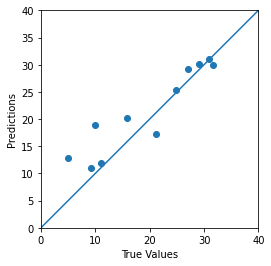

In [8]:
a = plt.axes(aspect='equal')
plt.scatter(testing_target, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 40]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [10]:
OutF = open("C:\\Users\\Honeyz\\Desktop\\Modeling\\Final models\\CoPyro Project\\Results\\Performace_Output_Char_DNN_Notebook.txt","a")
OutF.write("\n RMSE: ")
OutF.write(str(round(rmse,3)))
OutF.write("\n MAE: ")
OutF.write(str(round(mae,3)))
OutF.write("\n RSBS: ")
OutF.write(str(GridSearch_cv.best_params_))
OutF.write("\n")
OutF.close()

OutTD = open("C:\\Users\\Honeyz\\Desktop\\Modeling\\Final models\\CoPyro Project\\Results\\TestData_Output_Char_DNN_Notebook.txt","a")
OutTD.write("\n Actual data: ")
OutTD.write(str(testing_target.values))
OutTD.write("\n Prediction data: ")
OutTD.write(str(predictions))
OutTD.close()
